In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from array import *

In [2]:
# reading and shuffling the data

df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1]
y = myData.iloc[:, -1:]

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_y, test_y = X[:splitData], X[splitData:], y[:splitData], y[splitData:]

iter_value = 200
iter_value += 1
skip_num=10
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((10, 10, 10))
error_array = np.zeros((10, iter_scaled))

In [5]:
def randomiseMatrix(deg):
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()              # assigning random values for weights
    return A            

In [6]:
def stocasticGD(deg, X, y, learning_rate, iterations):
    
    A = randomiseMatrix(deg)
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):                 # for each row in input data
            row = X.iloc[z]                           # contains strength, temperature
            column = y.iloc[z]                    # contains pressure
            
            dotP_wx = 0                              # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row[0]**m) * (row[1]**n)                                                     # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                                                                                                                  # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) 
                
             # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):           # power of x2
                    A[m][n] -= (learning_rate/len(X)) * dotP_wx * (row[0]**m) * (row[1]**n)       # calculating w0,w1,w2,... for each iteration
                    
            sumItrError +=  (dotP_wx**2)*0.5  
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError
        
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
            for m in range(deg+1):                 
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = A[m][n]
    return sumItrError

Error of last iteration of degree  0  :   67.84128525493817

Error values after each 10 complete iterations : 
[1235.344523689627, 67.8831592691642, 67.84121300757313, 67.84128475262519, 67.8412852515566, 67.84128525491528, 67.841285254938, 67.84128525493821, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817, 67.84128525493817]


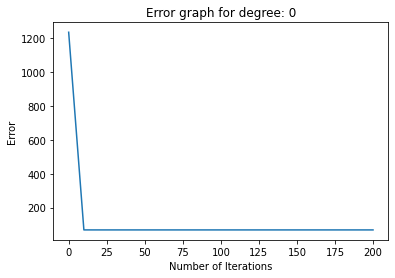

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  1  :   33.971210212779724

Error values after each 10 complete iterations : 
[265.8451731188796, 108.90548527922547, 99.96992787481098, 92.69165488223723, 86.36384104817994, 80.68022909807469, 75.4974652016383, 70.73926036398481, 66.35773533789694, 62.31776512430685, 58.590579762784714, 55.15109536185738, 51.97675283001232, 49.04696996524235, 46.342846648728795, 43.84697770797123, 41.54331445962867, 39.41705075960068, 37.454523436133485, 35.64312267069431, 33.971210212779724]


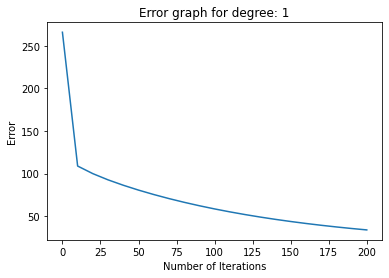

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  2  :   16.791565733760784

Error values after each 10 complete iterations : 
[762.0827096905272, 22.042753685894255, 20.135059673503225, 19.47102516721384, 19.05273507382195, 18.71744102175113, 18.433049060786335, 18.18876687315451, 17.97800024301344, 17.795564885132755, 17.637137216586876, 17.49907003393976, 17.378280021992264, 17.272159350381298, 17.178501971427675, 17.095441475300497, 17.02139858294136, 16.95503676645033, 16.895224736775443, 16.841004735694415, 16.791565733760784]


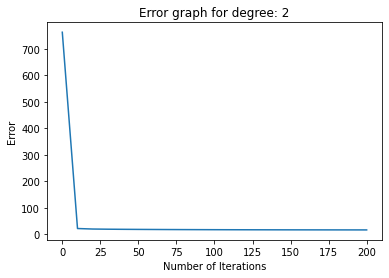

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  3  :   19.25887155396779

Error values after each 10 complete iterations : 
[94.51175527947193, 59.83844776956077, 49.774871379998196, 42.892555727817246, 37.65167191068996, 33.615178099110466, 30.496387179274773, 28.07931056688743, 26.199155326279186, 24.73004929675601, 23.575830486499953, 22.663023873161208, 21.9354795442996, 21.35027885448402, 20.874608664557105, 20.48337466902299, 20.157378985438104, 19.881928539472607, 19.645772355105986, 19.44028996452045, 19.25887155396779]


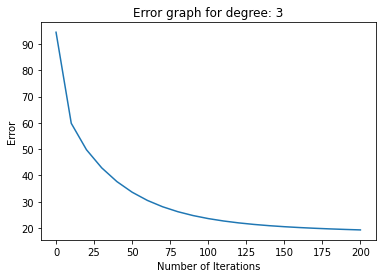

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  4  :   22.571085026676

Error values after each 10 complete iterations : 
[2419.6391671634237, 107.67532573844771, 61.45265828857917, 51.291352088772136, 44.620753934472205, 39.76847645408926, 36.176534294546826, 33.475246360170594, 31.407822151296187, 29.79487179387292, 28.51053604764258, 27.4660935199871, 26.59867076995731, 25.863449404249717, 25.228273565316396, 24.66990787122276, 24.171432353023576, 23.720422399602185, 23.307672053832288, 22.926294471021027, 22.571085026676]


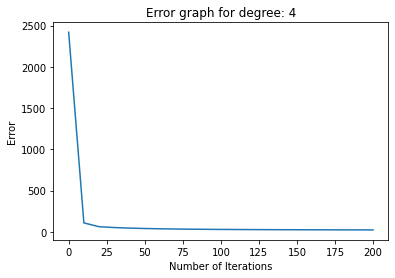

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  5  :   22.123734951232322

Error values after each 10 complete iterations : 
[984.0652186659966, 159.0992031903975, 102.5188472238135, 74.09787075665841, 56.71881533680432, 45.91978987808716, 39.099332999280726, 34.69406547485709, 31.7624430800061, 29.736337859512048, 28.27212229577677, 27.161325850739203, 26.276981705916853, 25.541370039697846, 24.90659901997443, 24.342895680583784, 23.831532343408735, 23.360543893937006, 22.922127969159604, 22.511061853484865, 22.123734951232322]


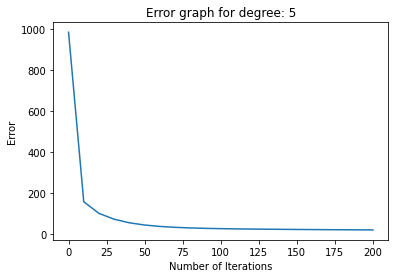

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  6  :   19.62859614266584

Error values after each 10 complete iterations : 
[200.35009462999537, 27.753579799339278, 25.973842908064697, 24.857636100374464, 24.052852387108373, 23.441017848025574, 22.95241007973321, 22.54503874334863, 22.193263878945864, 21.881189856142715, 21.598785615286598, 21.339584091548097, 21.09930576155651, 20.87502812634596, 20.66468060180398, 20.466734986383926, 20.280014376362807, 20.1035743183582, 19.93662829764829, 19.778500596696677, 19.62859614266584]


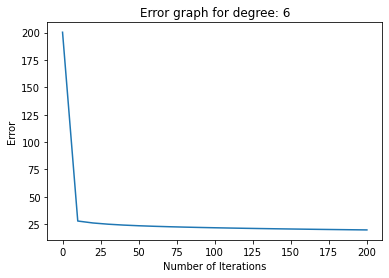

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  7  :   29.76461011538521

Error values after each 10 complete iterations : 
[1183.4778539673744, 83.82106519951199, 74.76156281411929, 68.62401519957248, 63.92898355576302, 60.02346796936422, 56.6049704934659, 53.528202055696475, 50.71889804699143, 48.13525737187554, 45.75065055978621, 43.545836025426276, 41.50543103060124, 39.61628943550388, 37.86673622481973, 36.24618881732257, 34.74495451742367, 33.354109512905026, 32.065416795390426, 30.871263685669692, 29.76461011538521]


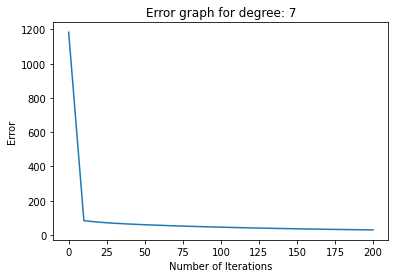

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  8  :   21.198733252718835

Error values after each 10 complete iterations : 
[387.38338981067807, 70.7465890862769, 53.93996502542597, 45.583442129503204, 40.843038526109474, 37.73496872722944, 35.42085053526348, 33.53637657629528, 31.916898070890124, 30.48355519811012, 29.195262125589217, 28.02810338624584, 26.966321793514325, 25.998290763861494, 25.11466745080936, 24.307517231643548, 23.569878996300254, 22.895534625440302, 22.278875418977332, 21.714816095518483, 21.198733252718835]


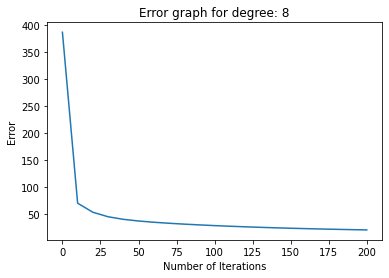

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  9  :   29.501993965429783

Error values after each 10 complete iterations : 
[1597.9546618814138, 99.84719441612366, 90.6109293634101, 83.1024083319226, 76.60205249278813, 70.84103328681992, 65.68465025153517, 61.04993821903407, 56.8761741032188, 53.11391575100187, 49.72066630988052, 46.65897434761194, 43.89546496571124, 41.40024827961967, 39.1464956365914, 37.110101216232145, 35.26939491909539, 33.60489125403838, 32.099066506746695, 30.736159659302402, 29.501993965429783]


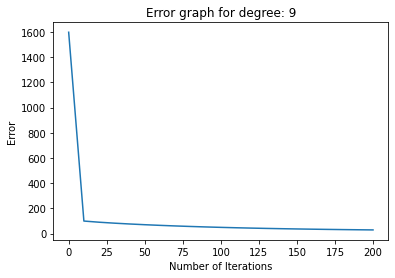

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Degree  2  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1
x_axis=[]

for i in range(iter_scaled):
    x_axis.append(i*skip_num)
    
for i in range(10):
    SGD_Error = stocasticGD(i, train_X, train_y, 0.5, iter_value)
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
    
    error_list = error_array[i].tolist()
    print("\nError values after each 10 complete iterations : ")
    print(error_list)
    
    plt.plot(x_axis, error_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    error_list=error_array[i].tolist()
    
print("Degree ", minErrorDeg, " gives minimum error.")      


In [8]:
def Predict_SGD(deg, X, y, iterations):
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):             # for each row in input data
            row = X.iloc[z]                       # contains strength, temperature
            column = y.iloc[z]                 # contains pressure
            
            dotP_wx = 0                          # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += coeff_list[deg][m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx = column[0] - dotP_wx                   # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn
            sumItrError +=  (dotP_wx**2)*0.5  
            
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
    return sumItrError

In [9]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(10):
    SGD_Error = Predict_SGD(i, test_X, test_y, iter_value)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("Degree ", minErrorDeg, " gives minimum testing error. \nMinimum testing error = ", minError) 

Testing errors for various degrees are as follows:
Error of last iteration of degree  0  :   28.484593750849562
Error of last iteration of degree  1  :   13.612809290478967
Error of last iteration of degree  2  :   6.345679695744923
Error of last iteration of degree  3  :   7.238458260304731
Error of last iteration of degree  4  :   8.691455197107608
Error of last iteration of degree  5  :   8.410590452690991
Error of last iteration of degree  6  :   7.323460520011585
Error of last iteration of degree  7  :   12.35765557400446
Error of last iteration of degree  8  :   8.053576420089891
Error of last iteration of degree  9  :   11.40008636195996
Degree  2  gives minimum testing error. 
Minimum testing error =  6.345679695744923
